# Explaining cancer diagnosis with knowledge graph-based reasoning
This notebook demonstrates a sample examples of Explaining cancer diagnosis with knowledge graph-based reasoning. First we will see the construction of a small biomedical knowledge graph. 

## Construction of biomedical knowledge graphs
This is a quick demo about the construction of a small knowledge graph about cancer. Let assume we have the following short abstract from MeSH: 

"The tumor protein p53 (TP53), which is a frequently mutated oncogene responsible for breast carcisona (BRCA). It is also a tumour-suppressor gene, which is mentioned in 250 PubMed articles. On the other hand, Lysine (K)-specific demethylase 6A (KDM6A) is a highly significantly mutated "oncogene" and responsible for Bladder Urothelial Carcinoma (BLCA) cancer type".  

Now let assume that TP53 and KDM6A biomarkers have preferred names "Tumorprotein p53" (German) and "K-specific demethylase 6A" (English). 

**Controlled vocabularies/terms with URIs:** 
According to our ontology, cancer is a disease and biomarkers are responsible for different types of cancer. So, cancer should be a sub-class of disease. Also, biomarkers should be another class and different types of gene should belong to this class. 
  
**Classes**: 
  - Disease: http://www.cancer.org/#Disease
  - Cancer: http://www.cancer.org/#Cancer
  - Biomarker: http://www.cancer.org/#Biomarker 

**Instances**
  - BLCA: http://www.cancer.org/#BLCA
  - BRCA: http://www.cancer.org/#BRCA
  - TP53: http://www.cancer.org/#TP53
  - KDM6A: http://www.cancer.org/#KDM6A

**Properties:**
  - Responsible for: http://www.cancer.org/#responsibleFor 
  - Caused by: http://www.cancer.org/#causedBy 
  - Has significance: http://www.cancer.org/#hasSignificance 
  - Has evidence: http://www.cancer.org/#hasEvidence 
  - Has type: http://www.cancer.org/#hasType 

**Useful prefixes:**
  - PREFIX ex: < http://www.cancer.org/#> 
  - PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
  - PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
  - PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

You may use the use following prefixes: 
- PREFIX ex: <http://www.cancer.org/#> 
- PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
- PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
- PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

In [1]:
%reload_ext jupyter-rdfify

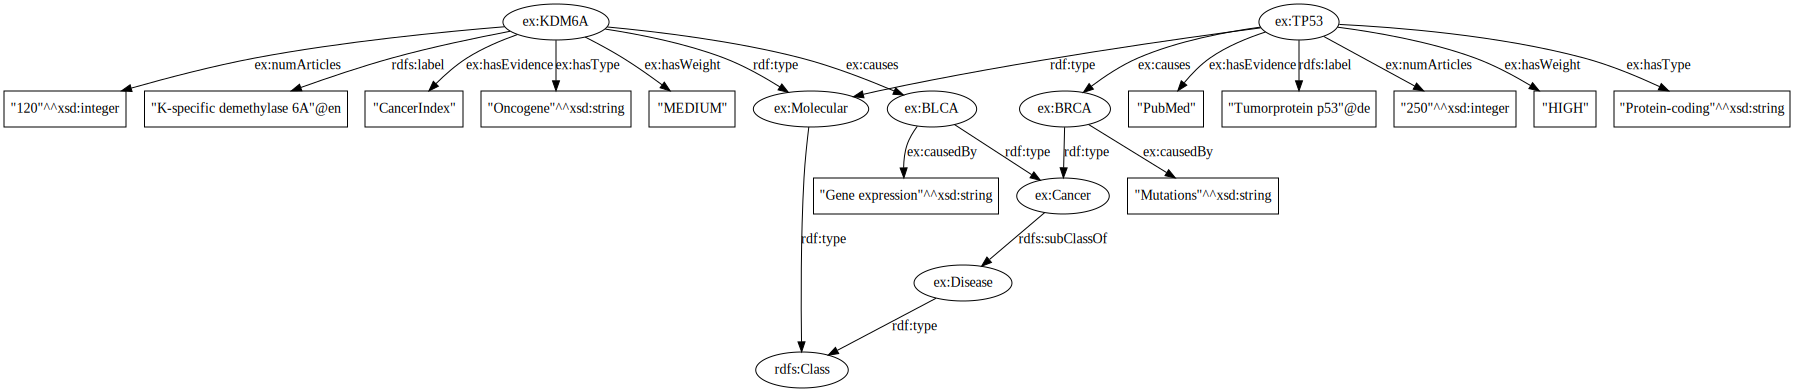

In [108]:
%%rdf turtle -l cancer_kg

PREFIX ex: <http://www.cancer.org/#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

ex:Disease   a rdfs:Class .
ex:Cancer    rdfs:subClassOf ex:Disease .
ex:Molecular a rdfs:Class .

ex:TP53 a ex:Molecular ;
        ex:causes ex:BRCA ;
        ex:hasType "Protein-coding"^^xsd:string ;
        rdfs:label "Tumorprotein p53"@de ;
        ex:hasEvidence "PubMed" ;
        ex:numArticles "250"^^xsd:integer ;
        ex:hasWeight "HIGH" .

ex:KDM6A a ex:Molecular ;
        ex:causes ex:BLCA ;
        ex:hasType "Oncogene"^^xsd:string ;
        rdfs:label "K-specific demethylase 6A"@en ;
        ex:hasEvidence "CancerIndex" ;
        ex:numArticles "120"^^xsd:integer ;
        ex:hasWeight "MEDIUM" .

ex:BRCA a ex:Cancer ;
        ex:causedBy "Mutations"^^xsd:string .

ex:BLCA a ex:Cancer ;
        ex:causedBy "Gene expression"^^xsd:string .

Now assume that TP53 and KDM6A biomarkers cause (use ex:causes) BRCA and Bladder Urothelial Carcinoma (BLCA) cancer types via a biological process called "Gene expression" (use ex:causedBy) with expression values (use ex:hasExpressionValue) of 1.0 and -0.35mm, respectively.

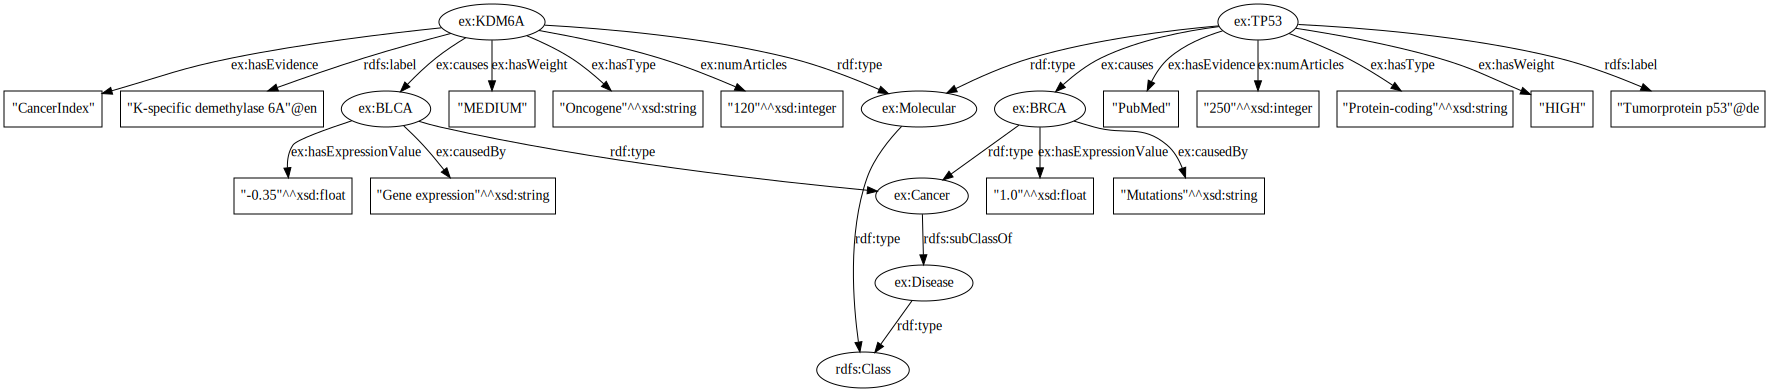

In [2]:
%%rdf turtle -l cancer_kg

PREFIX ex: <http://www.cancer.org/#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

ex:Disease   a rdfs:Class .
ex:Cancer    rdfs:subClassOf ex:Disease .
ex:Molecular a rdfs:Class .

ex:TP53 a ex:Molecular ;
        ex:causes ex:BRCA ;
        ex:hasType "Protein-coding"^^xsd:string ;
        rdfs:label "Tumorprotein p53"@de ;
        ex:hasEvidence "PubMed" ;
        ex:numArticles "250"^^xsd:integer ;
        ex:hasWeight "HIGH" .

ex:KDM6A a ex:Molecular ;
        ex:causes ex:BLCA ;
        ex:hasType "Oncogene"^^xsd:string ;
        rdfs:label "K-specific demethylase 6A"@en ;
        ex:hasEvidence "CancerIndex" ;
        ex:numArticles "120"^^xsd:integer ;
        ex:hasWeight "MEDIUM" .

ex:BRCA a ex:Cancer ;
        ex:causedBy "Mutations"^^xsd:string ;
        ex:hasExpressionValue "1.0"^^xsd:float .

ex:BLCA a ex:Cancer ;
        ex:causedBy "Gene expression"^^xsd:string ;
        ex:hasExpressionValue "-0.35"^^xsd:float .

Let the APC biomarker has the following properties (use ex:hasMolecularProperty):

- Stimulates (ex:stimulates) the formation of: APC protein 
- Causes colorectal and lung cancer in humans (ex:causedCancerTypes): CRC, LUAD
- Highly and significantly mutated (ex:hasSignificance) in cancer patients: 76% 
- Was first identified (ex:wasDiscoveredIn) in a clinical study published in: 1991.

We can model above information as a list or binary relations and by considering all the properties as literals strings. 

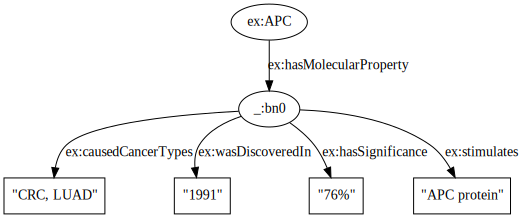

In [154]:
%%rdf turtle -l cancer_kg

PREFIX ex: <http://www.cancer.org/#> 
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 
        
ex:APC ex:hasMolecularProperty _:property .
_:property ex:stimulates "APC protein" .
_:property ex:causedCancerTypes "CRC, LUAD" .
_:property ex:hasSignificance "76%" .
_:property ex:wasDiscoveredIn "1991" .

Now let all genes (ex:Gene) and proteins (ex:Protein) are molecular (ex:Molecular). Blood pressure (ex:BloodPressure) and red blood count (ex:RBC) are physiologic (ex:Physiologic). All moleculars and physiologics are biomarkers (ex:Biomarker).

We can now model these information as sub-class and super-class relationships. 

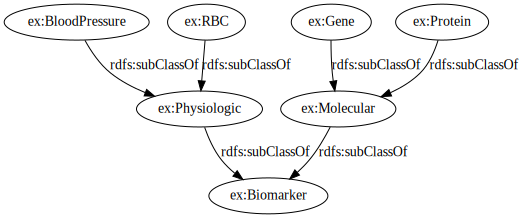

In [155]:
%%rdf turtle -l cancer_kg

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX ex: <http://www.cancer.org/#> 

ex:Gene rdfs:subClassOf ex:Molecular .
ex:Protein rdfs:subClassOf ex:Molecular .

ex:BloodPressure rdfs:subClassOf ex:Physiologic  .
ex:RBC rdfs:subClassOf ex:Physiologic  .

ex:Molecular rdfs:subClassOf ex:Biomarker .
ex:Physiologic rdfs:subClassOf ex:Biomarker . 

## Explaining biological process using knowledge graph-based reasosning 

The above information gives the following RDF graph snippets: 

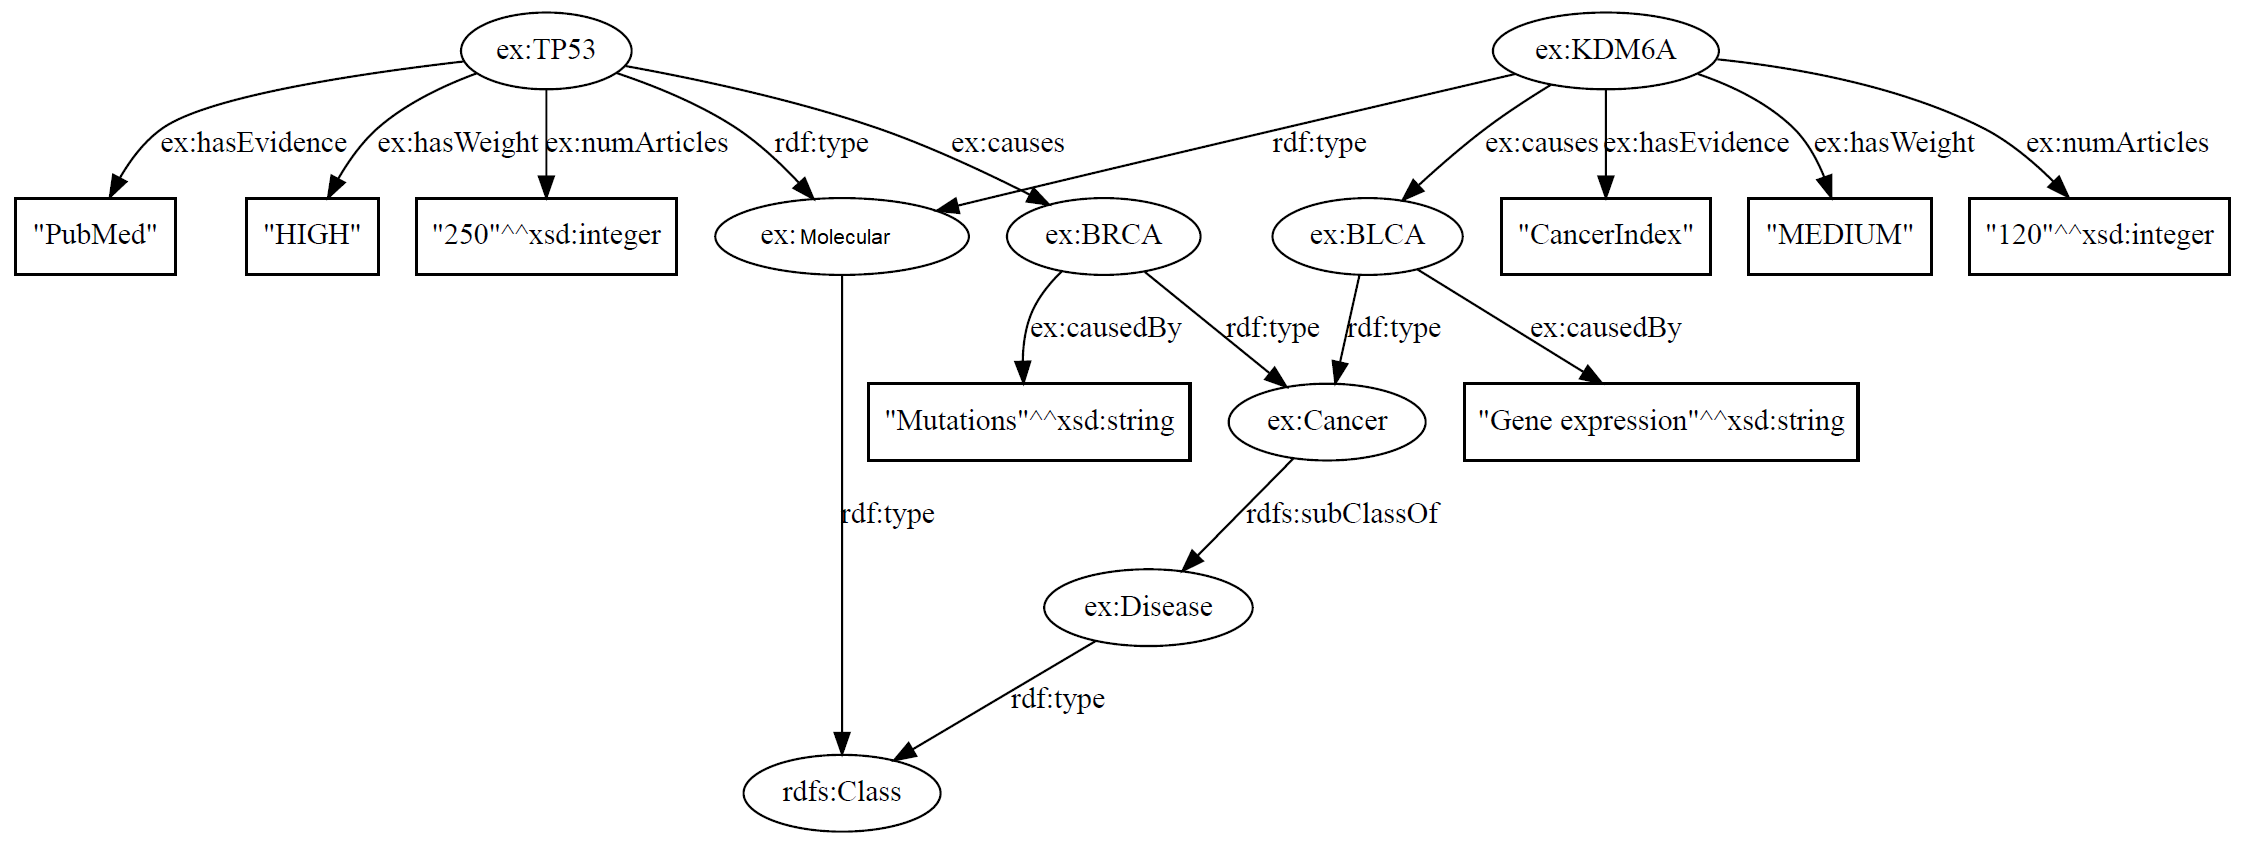

In [3]:
from IPython import display
display.Image("example_graph.png_sw_exam1.PNG")

If we see, the above knowledge graphs can be viewed as the discrete symbolic representations of knowledge in the form of triples: 

    (TP53, responsibleFor, BRCA)
    (TP53, hasType, POTSF)
    (BRCA, a, Cancer)
    (POTSF, hasEvidence, PubMed). 

So, reasoning over this knowledge graph would naturally leverage the symbolic technique and would allowing question answering and reasoning. 


### Deducing new knowledge

Given the antecedents: "All oncogenes are responsible for cancer"; "TP53 is an oncogene", a semantic reasoner would be able to deduce the following fact: "TP53 is responsible for cancer". 


### Question answering 

For this example, which POTSF biomarker is highly responsible for breast carcinoma and has PubMed evidence?, the reasoning engine will follow a logical reasoning path to reason about the concept ‘unknown’. 

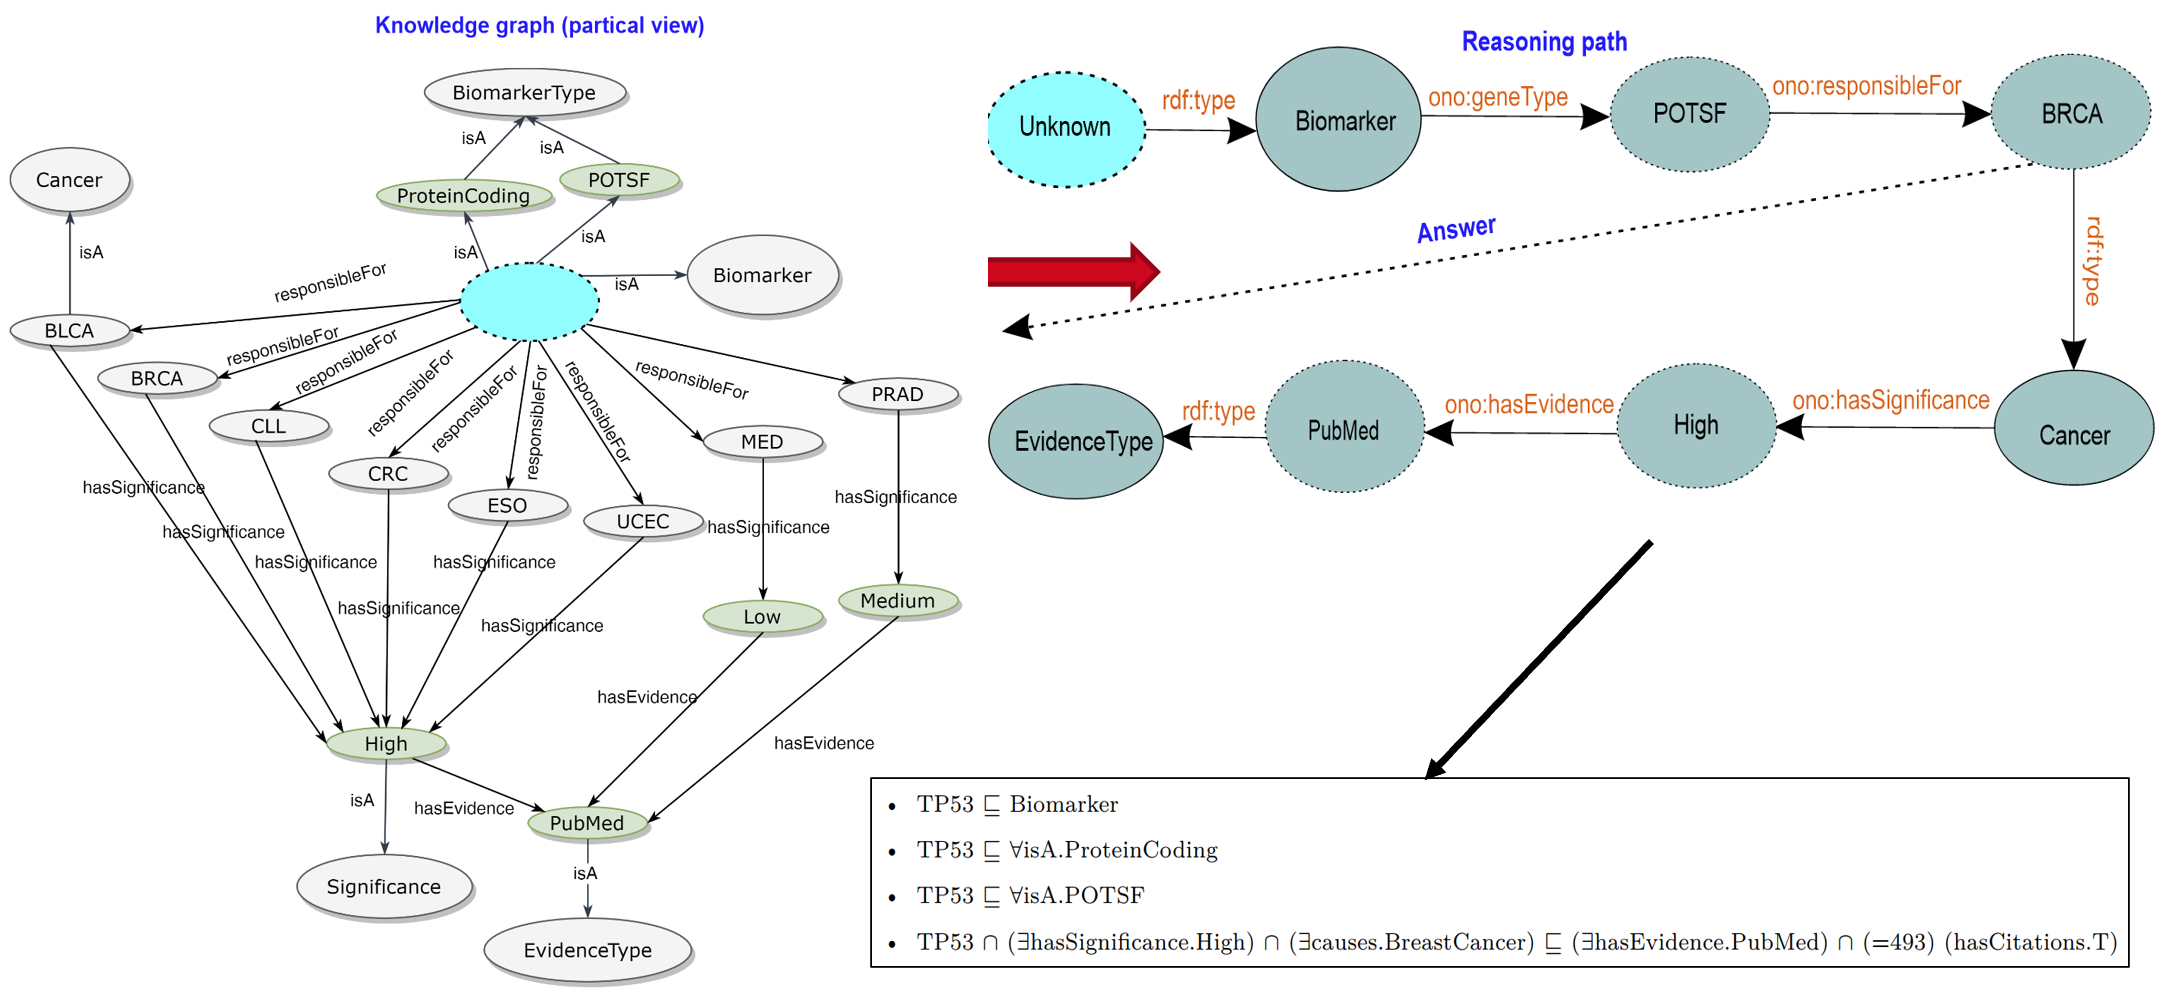

In [4]:
from IPython import display
display.Image("2.png")

### Explaining with evidence-based rules
If we have a knowledge graph with all the facts about the process and cancer-specific marker genes (biomarkers), a neuro-symbolic AI system would be able to validate the predictions made by the ML model based on the facts presented in the knowledge graph. Further, a medical doctor would be bale to explain the diagnosis decision with evidence. Nevertheless, the doctor could explain the decision in natural language as well by combining constrastive explanations. The following figure shows an example. 

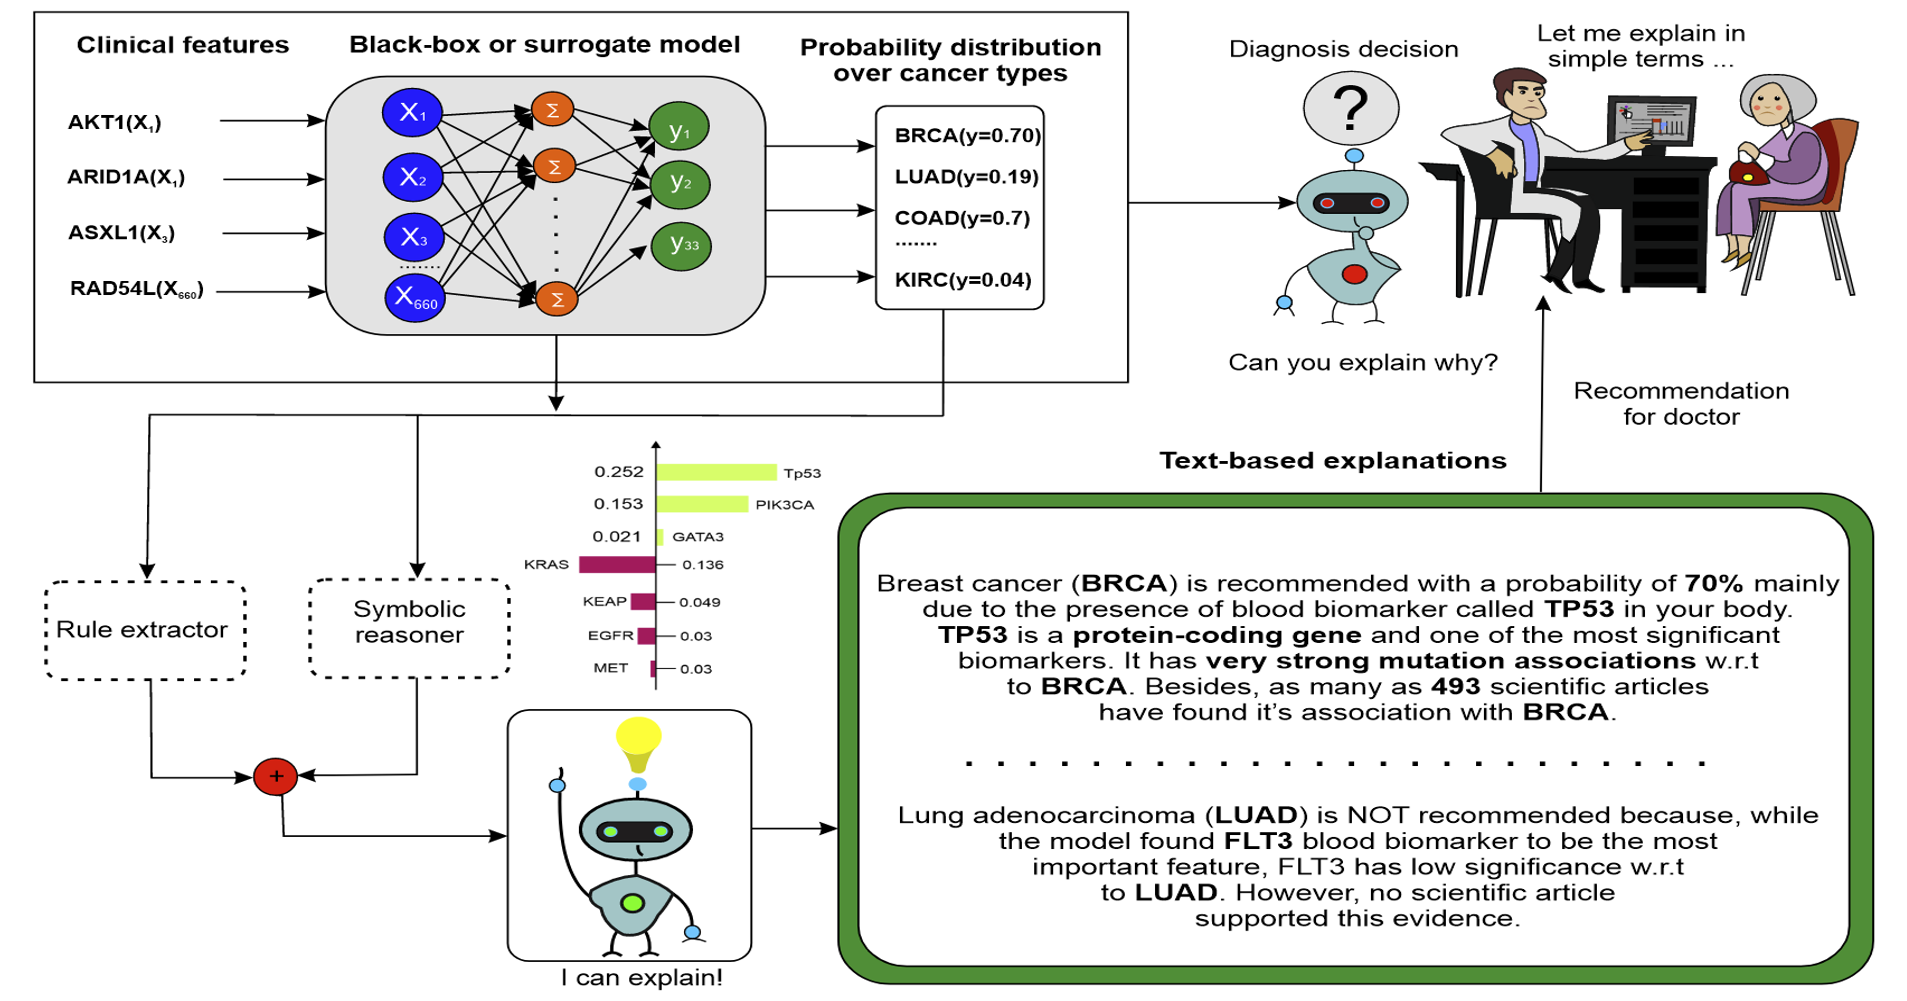

In [5]:
from IPython import display
display.Image("3.png")